## Python 数学建模算法与应用 笔记
---
### 概论
#### 模型分类：

-白箱：物理模型，机理清晰
    
-灰箱：生态、经济，了解部分机理但不准确不完整
    
-黑箱：机理未知

#### 建模的一般步骤与论文结构：

注意！

---

Estimated π using 10000 samples: 3.1452


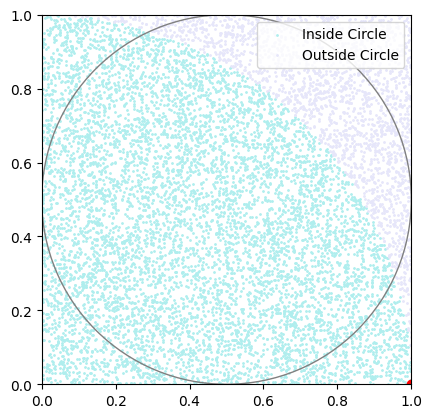

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  



#示例数据，pi的近似
def monte_carlo_pi(num_samples):  
    inside_circle = 0  
    for _ in range(num_samples):  
        x, y = np.random.rand(), np.random.rand()  
        if x**2 + y**2 <= 1:  
            inside_circle += 1  
    pi_estimate = 4 * inside_circle / num_samples  
    return pi_estimate  
  
num_samples = 10000  
pi_estimate = monte_carlo_pi(num_samples)  
print(f"Estimated π using {num_samples} samples: {pi_estimate}")  
  
# 可视化  
fig, ax = plt.subplots()  
ax.set_aspect('equal')  
ax.plot(1, 0, 'ro')  # 标记圆心  
inside_x, inside_y = [], []  
outside_x, outside_y = [], []  
  
for _ in range(num_samples):  
    x, y = np.random.rand(), np.random.rand()  
    if x**2 + y**2 <= 1:  
        inside_x.append(x)  
        inside_y.append(y)  
    else:  
        outside_x.append(x)  
        outside_y.append(y)  
  
ax.scatter(inside_x, inside_y, color='paleturquoise', s=1, label='Inside Circle')  
ax.scatter(outside_x, outside_y, color='lavender', s=1, label='Outside Circle')  
ax.add_artist(plt.Circle((0.5, 0.5), 0.5, color='grey', fill=False, linewidth=1))  # 绘制圆  
ax.set_xlim(0, 1)  
ax.set_ylim(0, 1)  
ax.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.show()

### Python 语法
基本工具而不是核心

---

### 线性代数模型
#### 差分方程
数列递推问题

In [1]:
import sympy as sp
sp.var('k');y=sp.Function('y')
f=y(k+2)-y(k+1)-y(k)
s=sp.rsolve(f,y(k),{y(0):1,y(1):1})
#print(s)

$(1/2 - \sqrt(5)/2)^k\times(1/2 - \sqrt(5)/10) + (1/2 + \sqrt(5)/2)^k\times(\sqrt(5)/10 + 1/2)$

#### Leslie 种群模型
1. 划分年龄组
2. 种群分布向量
3. 生育率（生的加一起）、存活率（逐时间死亡）

-sympy：求特征值特征向量，具体计算要自己写（P59）

In [2]:
import numpy as np  
  
def leslie_model(population, fertility, survival):  
    """  
    莱斯利种群模型。  
      
    参数:  
    population : numpy数组，表示初始各年龄组的人口数量。  
    fertility : numpy数组，表示各年龄组的生育率。  
    survival : numpy数组，表示各年龄组到下一年龄组的存活率。  
      
    返回:  
    下一年各年龄组的人口数量。  
    """  
    # 确保输入是numpy数组  
    population = np.array(population)  
    fertility = np.array(fertility)  
    survival = np.array(survival)  
      
    # 计算下一年的种群分布  
    next_population = np.zeros_like(population)  
    next_population[0] = np.dot(fertility, population)  # 幼年组由所有成年组的生育贡献  
    next_population[1:] = population[:-1] * survival[:-1]  # 其他年龄组由前一年龄组的存活个体组成  
      
    return next_population  
  
# 初始种群分布：幼年=500, 成年=1000, 老年=500  
initial_population = [500, 1000, 500]  
  
# 生育率：幼年=0, 成年=0.5, 老年=0  
fertility_rates = [0, 4, 3]  
  
# 存活率：幼年=0.8, 成年=0.9, 老年=0.7（注意：老年的存活率不影响模型输出，因为老年没有下一代）  
survival_rates = [0.5, 0.25, 0]  
  
# 模拟10年  
years = 10  
for year in range(years):  
    initial_population = leslie_model(initial_population, fertility_rates, survival_rates)  
    print(f"Year {year + 1}: {initial_population}")

Year 1: [5500  250  250]
Year 2: [1750 2750   62]
Year 3: [11186   875   687]
Year 4: [5561 5593  218]
Year 5: [23026  2780  1398]
Year 6: [15314 11513   695]
Year 7: [48137  7657  2878]
Year 8: [39262 24068  1914]
Year 9: [102014  19631   6017]
Year 10: [96575 51007  4907]


#### PageRank from Google
一篇文献的质量和重要性可以通过其他文献对其引用的数量和引文质量来分析

-图论

步骤：
1. 有向图，网页为顶点，链接为弧
2. 定义马尔科夫链状态转移概率矩阵
3. 求其平稳分布

In [3]:
from scipy.sparse.linalg import eigs #计算大型稀疏矩阵的特征值和特征向量

#### 推荐系统评分问题
-衡量菜品相似性

-评分估计（相似度加权）

#### 图像压缩问题
---

### 线性规划&整数规划

**注意：数学规划模型必须做灵敏度分析**
运输问题

下料问题
#### 整数规划
-背包问题

1. 带与不带：1&0
2. 最大携带重量

-指派问题

去和不去：二值逻辑问题

-旅行商问题

In [4]:
import cvxpy as cp

---

### 非线性规划和多目标规划
#### 分类
-无约束

-有约束

-凸规划

#### 二次规划模型
目标函数是决策向量的二次函数（QP）
#### 多目标规划

---

### 图论

#### 分类
#### 无向图

$
G=(V,E)
$

$
V=\{v_1,v_2,...,v_n\}  顶点集
$

$
E=\{e_1,e_2,...,e_n\}  边集
$



#### 有向图
$
D=(V,A)
$

$
V=\{v_1,v_2,...,v_n\}  顶点集
$

$
A=\{a_1,a_2,...,a_n\}  
$

每一条弧与一个有序的顶点相对应

-图的邻接矩阵、关联矩阵

-有向、无向赋权


##### 最短路算法
Dijkstra算法：最短路上的任意子段也是最短路
$
G=(V,E,W)
$

$
w_ij=
\begin{cases}
v_i,v_j \\  
\infty ,\text{顶点之间无边}\\
\end{cases}
$

算法：按固定起点$u_0$由近及远，依次求得$u_0$到图G各个顶点的最短路和距离，直到某个顶点$v_0$


##### NetworkX example

  (0, 1)	1
  (0, 2)	1
  (1, 2)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 5)	1
  (4, 1)	1
  (4, 3)	1
  (5, 4)	1


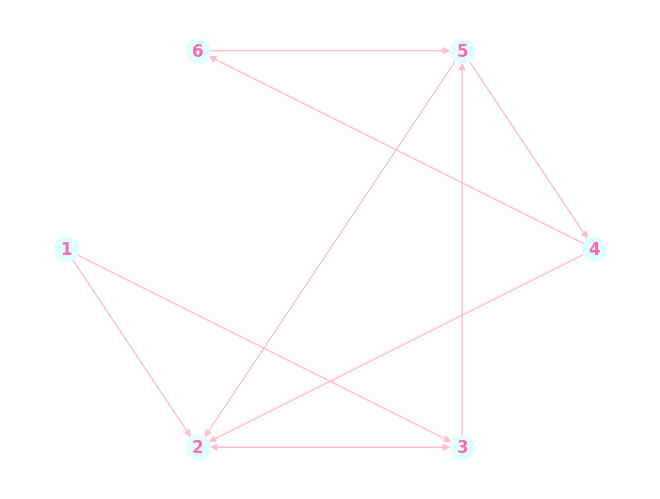

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G=nx.DiGraph()#有向图
List=np.array([[1,2],[1,3],[2,3],[3,2],[3,5],[4,2],[4,6],[5,2],[5,4],[6,5]])#（a,b),a指向b
G.add_nodes_from(range(1,7))#节点，前面用到是数字，这里就是数字
G.add_edges_from(List)#边信息，有向
#plt.rc('font',size=16)
pos=nx.shell_layout(G)
nx.draw(G,pos,with_labels=True,font_weight='bold',node_color='lightcyan',edge_color='pink',font_color='hotpink')
W=nx.adjacency_matrix(G)
print(W)
plt.show()

In [2]:
len=nx.dijkstra_path(G,source=1,target=6)
print(len)

[1, 3, 5, 4, 6]


#### 最小生成树
树：无圈；顶点数=边数+1

最小生成树（MST）是一个在图论中经常提到的概念，特别是在加权连通图中。它指的是一个包含图中所有顶点且边的权重之和最小的生成树。

假设我们有一个城市网络图，图中的每个顶点代表一个城市，每条边代表两个城市之间的道路，并且每条边都有一个权重，代表两个城市之间的距离或交通成本。我们的目标是找到一种方式，用最小的总成本连接所有的城市。

在这个例子中，最小生成树就是找到一棵包含所有城市（顶点）且边的权重之和最小的树。这棵树将展示如何用最小的总成本（或距离）连接所有的城市。

具体来说，如果我们有4个城市（A、B、C、D），并且它们之间的道路和权重如下：

- A到B的道路权重为10
- A到C的道路权重为15
- B到C的道路权重为10
- B到D的道路权重为20
- C到D的道路权重为30

那么，一个可能的最小生成树是：

- A到B的道路（权重10）
- A到C的道路（权重15）
- B到D的道路（权重20）

这棵树包含了所有的城市，并且边的权重之和为45，这是连接所有城市的最小可能成本。注意，虽然B到C和C到D的道路也存在，但它们并不在这个最小生成树中，因为我们可以找到更小的权重组合来连接所有的城市。

**最小生成树就是以最小权重和，能将所有顶点连通的方式，一般讲MST时都是无向的，如果明确是有向图，则要考虑的是最小有向生成图的问题（一般不会有这样的问题）**

#### 着色问题
NP-完全问题

-$min$色数$X(G)\leq\delta+1$

-每一个顶点均被着色

-相邻的顶点不撞色（构成边的两点）

-0-1变量表示着色

#### 最大流与最小费用流问题
#### 关键路径
计划网络图    时间参数
#### 订购与运输问题

---

### 插值与拟合问题
#### 插值方法
插值与拟合的区别：插值得到的函数要过所有点，拟合不需要

**多项式插值**

拉格朗日插值法：构造一组基函数使得带入各点坐标恰好得到该点处函数值

牛顿插值：差商；优点可以随时增加点

**问题**
龙格振荡现象

*分段线性插值*

**↓**

*三次样条插值*
：分段线性插值连接点不光滑，加入样条，成为样条函数（光滑的分段多项式）

**二维插值**

-网格节点插值

-散乱数据插值

#### 拟合

**最小二乘** **非线性拟合**

---

### 常微分方程和差分方程
#### 传染病预测问题

##### 指数传播模型

##### **SI模型**

***模型假设***
1. 传播期内人口总数$N$不变，无生死，无迁移
2. 人群分为易感染者susceptible和已感染者infective
3. 占比$s(t)+i(t)=1$
4. 日感染率$\lambda$
5. 病后不愈不死

$
\begin{cases}
\frac{d(i)}{dt}=\lambda i(t)(1-i(t)) ,t>0\\
\\
i(0)=i_0\\
\end{cases}
$

##### **SIS模型**
***进一步假设***

-每天治愈的病人比例为$\mu$

-被治愈后可以再次感染

##### **SIR模型**
*人群分为健康、病人、病愈者（有免疫力）*

病人日感染率$\lambda$,日治愈率$\mu$,传染强度$\sigma=\frac{\lambda}{\mu}$
人口总数$N$不变

***↑系统动力学模型***

#### 洛伦兹模型 混沌效应
洛伦兹模型是一个涉及多个领域的概念，根据不同的应用背景，其含义和用途也有所不同。以下是关于洛伦兹模型的几个主要方面的介绍：
1. **定义与背景**： 洛伦兹模型的提出，揭示了混沌现象的存在，即两个原本几乎重合的相空间轨道，随着时间的发展会呈指数的分离，变成两条无关的轨道。这种现象对于理解非线性动力系统的复杂性和不可预测性具有重要意义。
2. **数学表达**：
   - 洛伦兹模型由以下三个微分方程组成：
     - dx/dt = σ * (y - x)
     - dy/dt = x * (ρ - z) - y
     - dz/dt = x * y - β * z
     其中，σ、ρ、β是洛伦兹系统的参数。
3. **特性与应用**：
   - **奇点吸引力**：洛伦兹曲线中存在奇点，对曲线起到吸引作用。任何初始条件下，洛伦兹曲线都将以一定的方式向相应的奇点收敛。
   - **敏感依赖性**：洛伦兹曲线对初始条件非常敏感。微小的初始条件变化可能导致曲线演化出完全不同的轨迹，这是洛伦兹曲线混沌性的一个重要表现。
   - **应用领域**：用来描述大气运动、流体力学、电磁场耦合等现象，并帮助科学家深入研究动力系统的性质和行为。此外，在信息安全领域，洛伦兹曲线的不可预测性特征也被用于混沌加密算法中，以保护信息的机密性。


#### 人口模型
##### **Malthus模型**
（指数暴涨）
#####  **Logistic**
增长率$r(x)$是x的减函数

***假设***
1. 设$r(x)=r-sx$
2. $x=x_m$时,$r(x_m)=0$

$\begin{cases}
\frac{dx}{dt}=r(1-\frac{x}{x_m}),\\
x(t_0)=x_0.\\
\end{cases}
$

#### 种群相互作用模型
##### **1.种群竞争**
每一种种群增长都受到Logistic制约且依靠同一资源生存

单独存在时的极限为$K_1$和$K_2$,每个个体的资源消耗相同，资源消耗量$==$个体数目（线性相关）

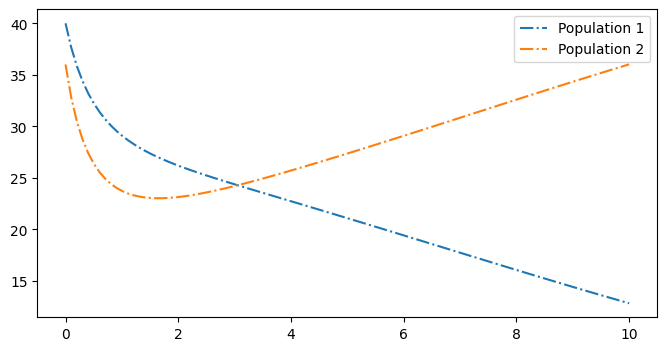

In [65]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

r_1=1;r_2=2#初始
num=np.array([40,36])#两个种群
alpha=np.array([1.2,1])#消耗资源比例

t=np.linspace(0,10,100)

def func_r(num,t):
    return [r_1*(1-(num[0]+alpha[0]*num[1])/50)*num[0],
            r_2*(1-(num[1]+alpha[1]*num[0])/50)*num[1]]
Solve=odeint(func_r,num,t)
#print(Solve)
fig,axes=plt.subplots(figsize=(8,4))

axes.plot(t, Solve[:, 0], '-.', label='Population 1')  
axes.plot(t, Solve[:, 1], '-.', label='Population 2')  
axes.legend()  
plt.show()

#### 捕食者-被捕食者模型（弱肉强食问题）
***基本假设***
1. 自身受logistic规律限制
2. 互相影响
3. $r_1,r_2,K_1,K_2$

$\begin{cases}
\frac{dx_1}{dt}=r_1(1-\frac{x_1}{K_1})x_1+b_{12}x_1x_2,\\ \\
\frac{dx_2}{dt}=r_2(1-\frac{x_2}{K_2})x_2-b_{21}x_2x_1.\\
\end{cases}
$

[[70.         40.        ]
 [69.98616305 40.8005154 ]
 [69.94431941 41.61590437]
 ...
 [63.74526492 26.15333417]
 [64.17837168 26.51772641]
 [64.60249246 26.89862017]]


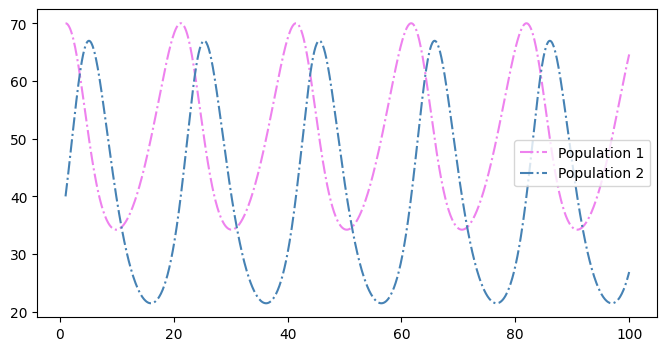

In [63]:
#弱肉强食问题

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sp.var('x,y')
n=np.array([x,y])
r=np.array([0.2,0.5])
b=np.array([0.005,0.01])

t=np.linspace(1,100,1000)

def func_law_of_jungle(n,t):
    d1=r[0]*n[0]-b[0]*n[0]*n[1]
    d2=-r[1]*n[1]+b[1]*n[0]*n[1]
    return d1,d2

n0=np.array([70,40])

solution=odeint(func_law_of_jungle,n0,t)
print(solution)
fig,axes=plt.subplots(figsize=(8,4))

axes.plot(t, solution[:, 0], '-.', label='Population 1',color='violet')  
axes.plot(t, solution[:, 1], '-.', label='Population 2',color='steelblue')  
axes.legend()  
plt.show()

#### 差分方程
**相关模型**
- 贷款问题
- 人口增长
- 目标跟踪

***最优捕鱼策略问题***

---

### 数据统计分析方法
#### scipy.stats
- rvs：产生随机数，size指定大小
- pdf：随机变量的概率密度函数
- cdf：随机变量的分布函数
- sf：随机变量的生存函数
- ppf：分布函数的反函数
- stat：计算随机样本的期望与方差
- fit：对一组随机样本利用极大似然估计法，估计总体中的未知参数

#### numpy库统计函数

|**函数**|**mean**|**median**|**ptp**|**var**|**std**|**cov**|**corrcoef**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|计算功能|均值|中位数|极差|方差|标准差|协方差|相关系数|

---


### 聚类分析
#### K-means聚类
#### DBSCAN

- 需要归一化、标准化：线性模型，K-means聚类，SVM

- 不需要：基于决策树的Boosting和Bagging（随机森林，XGBoost，LightGBM）、朴素贝叶斯

---

### 博弈论

#### 案例
- 囚徒困境
- 智猪博弈
- 斗鸡博弈

#### 概念
- Player
- Strategies
- Payoff Function

#### 零和博弈


- 策略集$S_1=\{\alpha_1,...,\alpha_m\},S_2=\{\beta_1,...,\beta_n\}$
- 局势$(\alpha_i,\beta_j)$
- 赢得值$a_{ij}$,组成赢得矩阵$A$

**鞍点&稳定解**
：双方的最小赢得之和为0是局势具有稳定解的充要条件

#### 零和博弈的混合策略
***常见情况：不存在鞍点。无稳定解***
- 线性方程组解法
- 线性规划解法

**例：田忌赛马**
田忌和齐王各有上中下等马，每匹马只能参赛一次，同等级的马田忌不如齐王，但是如果田忌高级就可以赢齐王
双方可选的策略都是：
- 上中下
- 上下中
- 中上下
- 中下上
- 下上中
- 下中上

In [5]:
import numpy as np
import sympy as sp

#齐王的赢得矩阵
A=np.array([[3,1,1,1,1,-1],[1,3,1,1,-1,1],[1,-1,3,1,1,1],[-1,1,1,3,1,1],[1,1,-1,1,3,1],[1,1,1,-1,1,3]])
print(A)

[[ 3  1  1  1  1 -1]
 [ 1  3  1  1 -1  1]
 [ 1 -1  3  1  1  1]
 [-1  1  1  3  1  1]
 [ 1  1 -1  1  3  1]
 [ 1  1  1 -1  1  3]]


In [6]:
Az1 = np.hstack([A.T, -np.ones((6,1))]) #按水平顺序（列）堆叠数组
Az2 = np.vstack([Az1, [1,1,1,1,1,1,0]])  #构造完整的系数阵，按垂直顺序（逐行）堆叠数组
B = np.array([[0,0,0,0,0,0,1]]).T  #非线性方程组的常数项列，
Az3 = np.hstack([Az2,B]) #构造增广阵
Az4 = sp.Matrix(Az3.astype(int))  #转换为符号矩阵
s1 = Az4.rref()  #把增广阵化成行最简形
s2 = np.linalg.pinv(Az2) @ B  #求最小范数解
print('行最简形为：\n',s1[0]); print('最小范数解为：\n',s2)
np.savetxt('data16_3.txt',A,fmt='%.0f')

行最简形为：
 Matrix([[1, 0, 0, 0, 0, -1, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1/3], [0, 0, 1, 0, 0, 1, 0, 1/3], [0, 0, 0, 1, 0, -1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 1/3], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0]])
最小范数解为：
 [[0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [1.        ]]


**巫师僵局**

#### 双矩阵博弈

- 非合作
    - 纯策略
    - 混合策略
- 合作

### 偏微分方程
#### 数值解
#### 符号解

In [1]:
#程序文件ex17_3.py
import sympy as sp

sp.var('x,y')         #定义符号变量
f = sp.Function('f')  #定义符号函数
u = f(x,y); ux = u.diff(x); uy = u.diff(y)
eq = x*ux - y*uy + y**2*u - y**2
sp.pprint(eq)       #显示方程
s = sp.pdsolve(eq)  #求通解
sp.pprint(s)        #显示通解

  ∂              2            2     ∂          
x⋅──(f(x, y)) + y ⋅f(x, y) - y  - y⋅──(f(x, y))
  ∂x                                ∂y         
                   2    
                  y     
                  ──    
                  2     
f(x, y) = F(x⋅y)⋅ℯ   + 1


#### ***数值解***